# 6.3 - Árvore de Regressão

Árvores de regressão básicas particionam um conjunto de dados em grupos menores e então ajustam um modelo simples (constante) para cada subgrupo. Infelizmente, um modelo de árvore única tende a ser altamente instável e um preditor pobre. No entanto, por bootstrap agregando (ensacando) árvores de regressão, essa técnica pode se tornar bastante poderosa e eficaz. Além disso, isso fornece a base fundamental de modelos mais complexos baseados em árvore, como florestas aleatórias e máquinas de aumento de gradiente. Este tutorial irá ajudá-lo a começar com árvores de regressão e ensacamento.

## Decidindo as divisões

Primeiro, é importante perceber que o particionamento de variáveis é feito de maneira gananciosa e de cima para baixo. Isso significa apenas que uma partição executada anteriormente na árvore não será alterada com base nas partições posteriores. Mas como essas partições são feitas? O modelo começa com todo o conjunto de dados, S, e procura cada valor distinto de cada variável de entrada para encontrar o preditor e o valor de divisão que particiona os dados em duas regiões (R1 e R2) de modo que as somas gerais de erros de quadrados sejam minimizadas: $$minimizar\{SSE=\sum_{i\in{R_1}}(y_i-c_1)^2+\sum_{i\in{R_2}}(y_i-c_2)^2\}\ (2)$$
Tendo encontrado a melhor divisão, particionamos os dados nas duas regiões resultantes e repetimos o processo de divisão em cada uma das duas regiões. Este processo continua até que algum critério de parada seja alcançado. O que resulta é, normalmente, uma árvore muito profunda e complexa que pode produzir boas previsões no conjunto de treinamento, mas provavelmente sobrecarregará os dados, levando a um desempenho insatisfatório em dados invisíveis.

## Critério de complexidade de custo

Frequentemente, há um equilíbrio a ser alcançado na profundidade e complexidade da árvore para otimizar o desempenho preditivo em alguns dados invisíveis. Para encontrar esse equilíbrio, normalmente cultivamos uma árvore muito grande conforme definido na seção anterior e, em seguida, podamos de volta para encontrar uma subárvore ideal. Encontramos a subárvore ideal usando um parâmetro de complexidade de custo (α) que penaliza nossa função objetivo na Eq. 2 para o número de nós terminais da árvore (T) como na Eq. 3. $$minimizar\{SSE + \alpha|T|\}$$

Para um determinado valor de α, encontramos a menor árvore podada que tem o menor erro penalizado. Se você estiver familiarizado com a regressão regularizada, perceberá a estreita associação com o laço $L_1$ penalidade de norma. Tal como acontece com esses métodos de regularização, penalidades menores tendem a produzir modelos mais complexos, que resultam em árvores maiores. Considerando que penalidades maiores resultam em árvores muito menores. Consequentemente, à medida que uma árvore cresce, a redução no SSE deve ser maior do que a penalidade de complexidade de custo. Normalmente, avaliamos vários modelos em um espectro de α e usar validação cruzada para identificar o melhor α e, portanto, a subárvore ótima.

## Forças e fraquezas

### Existem várias vantagens nas árvores de regressão:

* Eles são muito interpretáveis.
* Fazer previsões é rápido (sem cálculos complicados, apenas procurando constantes na árvore).
* É fácil entender quais variáveis são importantes para fazer a previsão. Os nós internos (divisões) são as variáveis que mais reduziram o SSE.
* Se alguns dados estiverem faltando, podemos não ser capazes de descer toda a árvore até uma folha, mas ainda podemos fazer uma previsão calculando a média de todas as folhas na subárvore que alcançamos.
* O modelo fornece uma resposta “irregular” não linear, portanto, pode funcionar quando a superfície de regressão verdadeira não é lisa. Se for lisa, porém, a superfície constante por partes pode aproximar-se arbitrariamente (com folhas suficientes).
* Existem algoritmos rápidos e confiáveis para aprender essas árvores.

### Mas também existem alguns pontos fracos significativos:

* Árvores de regressão única têm alta variação, resultando em previsões instáveis (uma subamostra alternativa de dados de treinamento pode alterar significativamente os nós terminais).
* Devido à alta variação, as árvores de regressão única têm uma precisão preditiva pobre.

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree

Definindo o conjunto de dados

In [15]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])
  
# print the dataset
print(dataset) 

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [24]:
X = dataset[:, 1:2].astype(int) 
y = dataset[:, 2].astype(int) 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y)
y_pred = regressor.predict(X)
print("Predicted price:{}".format(y_pred[3])) 

Predicted price:8000.0


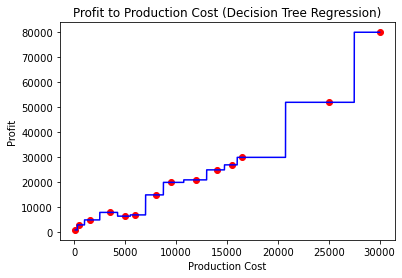

In [25]:
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

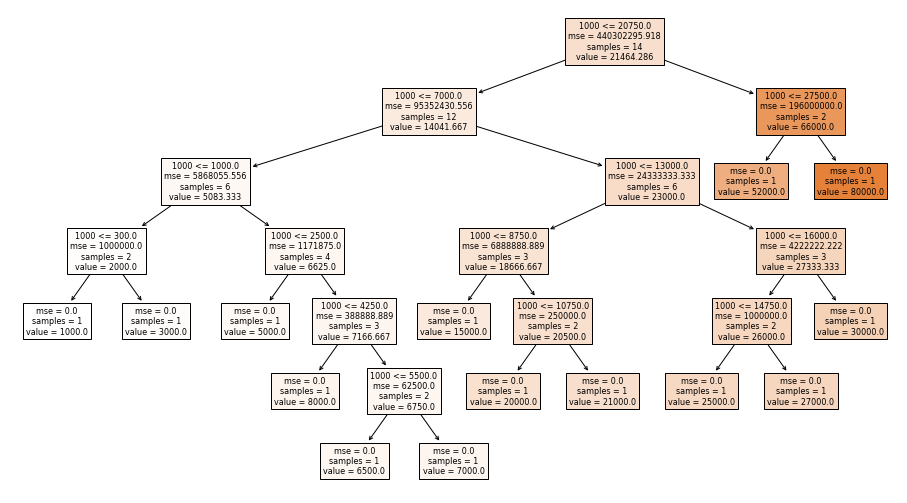

In [38]:
fig = plt.figure(figsize = (16,9))
_ = tree.plot_tree(regressor, feature_names = pd.DataFrame(dataset)[2],
                   class_names = pd.DataFrame(dataset).iloc[:,0:2],
                   filled = True)